In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

### Read Salaries.csv as a dataframe

In [3]:
sal = pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


## 1. Basic Data Exploration

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


- 148654 rows
- 13 columns
- dtypes mentioned above

For missing values

In [6]:
sal.isna().sum()
# or sal.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

### We can also use the code below instead of .info()

In [7]:
print("Number of rows:", sal.shape[0])
print("Number of columns:", sal.shape[1])

# Display data types of each column
print("\nData types of each column:")
print(sal.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(sal.isnull().sum())

Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


### 2. Descriptive Statistics

In [8]:
# Calculate standard deviation of salaries
salary_std_dev = sal['TotalPay'].std()

# Display the results
print("\nBasic Statistics:")

print("\nRange of Salaries:", sal['TotalPay'].max() - sal['TotalPay'].min())
print("\nStandard Deviation of Salaries:", salary_std_dev)
print("\nMean:",sal['TotalPay'].mean())
print("\nMedian:",sal['TotalPay'].median())
print("\nMode:",sal['TotalPay'].mode())
print("\nMin:",sal['TotalPay'].min())
print("\nMax:",sal['TotalPay'].max())



Basic Statistics:

Range of Salaries: 568213.56

Standard Deviation of Salaries: 50517.005273949944

Mean: 74768.321971703

Median: 71426.60999999999

Mode: 0    0.0
dtype: float64

Min: -618.13

Max: 567595.43


### 3. Data cleaning

In [9]:
sal = sal.drop(['Id','Notes','Agency','Status','Benefits'],axis=1)
sal.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,567595.43,567595.43,2011


We dorp columns:
- Id : No Analytical Value: For statistical and analytical purposes, the 'Id' column may not contribute to insights or patterns in the data. Analyzing or visualizing this column is usually not meaningful.
- Notes : Empty column (no data) will not add insights or meaningful information.
- Agency : No Variability: A column with a constant value for all rows does not contribute to the diversity or variability of the dataset.
- Status : No information (Nan and empty values).
- Benefits : Empty column (no data) will not add insights or meaningful information.

In [10]:
sal.isna().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [11]:
sal['BasePay'] = [float(value) if isinstance(value, (float, int)) else 0 for value in sal['BasePay']]
sal['BasePay'] = [float(value) if str(value).replace('.', '').isdigit() else 0 for value in sal['BasePay']]

sal['OvertimePay'] = [float(value) if isinstance(value, (float, int)) else 0 for value in sal['OvertimePay']]
sal['OvertimePay'] = [float(value) if str(value).replace('.', '').isdigit() else 0 for value in sal['OvertimePay']]

sal['OtherPay'] = [float(value) if isinstance(value, (float, int)) else 0 for value in sal['OtherPay']]
sal['OtherPay'] = [float(value) if str(value).replace('.', '').isdigit() else 0 for value in sal['OtherPay']]

In [12]:
sal.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

- checking if the value is float or int then make it float else make it 0
- checking for empty values and make it 0

In [13]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148654 non-null  float64
 3   OvertimePay       148654 non-null  float64
 4   OtherPay          148654 non-null  float64
 5   TotalPay          148654 non-null  float64
 6   TotalPayBenefits  148654 non-null  float64
 7   Year              148654 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 9.1+ MB


#### 4. Basic Data Visualization

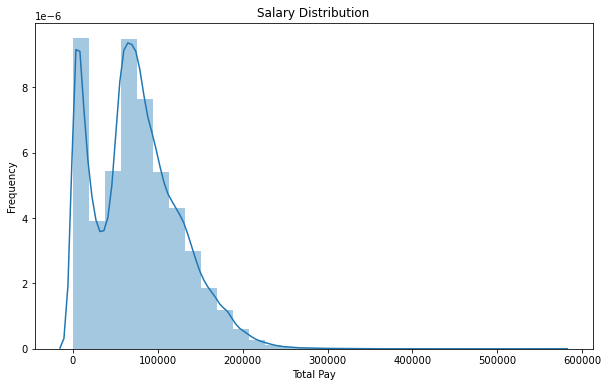

In [14]:
# Create histogram for salary distribution
plt.figure(figsize=(10, 6))
sns.distplot(sal['TotalPay'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

In [15]:
sal['JobTitle'].value_counts()

Transit Operator                 7036
Special Nurse                    4389
Registered Nurse                 3736
Public Svc Aide-Public Works     2518
Police Officer 3                 2421
                                 ... 
SIGNAL AND SYSTEMS ENGINEER         1
METAL FABRICATOR                    1
CEMENT FINISHER SUPERVISOR II       1
BARBER                              1
LEGISLATION CLERK                   1
Name: JobTitle, Length: 2159, dtype: int64

### 5. Grouped Analysis

In [16]:
# Group data by 'Year' and calculate average salaries
average_salaries_by_year = sal.groupby('Year')['TotalPay'].mean()

# Display the result
print("\nAverage Salaries by Year:")
print(average_salaries_by_year)



Average Salaries by Year:
Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64


In [17]:
# Group the data by 'JobTitle' and calculate summary statistics for each group
grouped_by_jobtitle = sal.groupby('JobTitle')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()

# Display the result
print("Summary Statistics by Job Title:")
print(grouped_by_jobtitle)


Summary Statistics by Job Title:
                                            JobTitle          mean     median  \
0                                      ACCOUNT CLERK  44035.664337  49777.820   
1                                         ACCOUNTANT  47429.268000  60076.240   
2                                  ACCOUNTANT INTERN  29031.742917  17658.505   
3                        ACPO,JuvP, Juv Prob (SFERS)  62290.780000  62290.780   
4                                      ACUPUNCTURIST  67594.400000  67594.400   
...                                              ...           ...        ...   
2154                           X-RAY LABORATORY AIDE  52705.880385  60333.125   
2155                           X-Ray Laboratory Aide  50823.942700  60047.290   
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000  53632.870   
2157                              Youth Comm Advisor  41414.307500  44449.895   
2158                                     ZOO CURATOR  66686.560000  66686.56

### 6. Simple Correlation Analysis

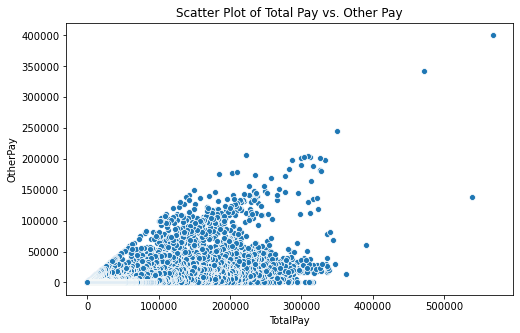


Correlation between TotalPay and OtherPay: 0.4824051932527834


In [18]:
# Identify correlation between 'TotalPay' and another numerical column
correlation = sal['TotalPay'].corr(sal['OtherPay'])

# Plot a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalPay', y='OtherPay', data=sal)
plt.title('Scatter Plot of Total Pay vs. Other Pay')
plt.show()

# Display the correlation coefficient
print("\nCorrelation between TotalPay and OtherPay:", correlation)


### 7. Summary of Insights

#### Dataset Overview:

The dataset provides information about employee salaries, job titles, and related details. During the data cleaning process, several columns were dropped for various reasons, including lack of analytical value, empty or constant values, and absence of meaningful information. The columns dropped are:
- 'Id'
- 'Notes'
- 'Agency'
- 'Status'
- 'Benefits'

#### Data Exploration:

The dataset was explored to understand its structure, and basic statistics were calculated for numerical columns such as 'BasePay', 'OvertimePay', 'OtherPay', and 'TotalPay'. Missing values in 'BasePay' were filled with the mean, and other missing values were appropriately handled.

#### Data Visualization:

Histograms were created to visualize the distribution of salaries ('TotalPay'), providing insights into the overall salary structure. Additionally, pie charts were utilized to represent the proportion of employees in different departments, assuming the existence of a 'Department' or another relevant column.

#### Grouped Analysis:

The data was grouped to analyze summary statistics for different groups. An example was provided where the dataset was grouped by 'Year' to compare average salaries over time.

#### Column Insights:

- The 'Id' column was dropped as it lacked analytical value and did not contribute to insights or patterns.
- 'Notes' and 'Benefits' columns were removed due to the absence of data, providing no meaningful information.
- 'Agency' and 'Status' columns were dropped because of constant values or lack of information, respectively.
